In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mno
import numpy as np
from sklearn import linear_model
%matplotlib inline
plt.style.use('bmh')

In [2]:
df = pd.read_csv("D:\DBS\DBS\Dissertation\Data\England\Championship (2019,2020).csv")

In [3]:
df2 = pd.read_csv("D:\DBS\DBS\Dissertation\Data\England\Conference (2019,2020).csv")
df3 = pd.read_csv("D:\DBS\DBS\Dissertation\Data\England\League 1 (2019,2020).csv")
df4 = pd.read_csv("D:\DBS\DBS\Dissertation\Data\England\League 2(2019,2020).csv")
df5 = pd.read_csv("D:\DBS\DBS\Dissertation\Data\England\Premier league (2019,2020).csv")


In [4]:
df_eng = pd.concat([df, df2,df3,df4,df5], ignore_index=True)

In [5]:
df_eng.shape

(2023, 106)

In [6]:
df_eng.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E1,02/08/2019,19:45,Luton,Middlesbrough,3,3,D,2,2,...,1.79,-0.25,1.94,1.96,1.96,1.96,1.98,1.98,1.94,1.93
1,E1,03/08/2019,15:00,Barnsley,Fulham,1,0,H,1,0,...,2.13,0.25,2.04,1.86,2.05,1.87,2.07,1.88,2.02,1.84
2,E1,03/08/2019,15:00,Blackburn,Charlton,1,2,A,0,1,...,1.84,-0.75,1.88,2.02,1.91,2.01,1.94,2.02,1.89,1.98
3,E1,03/08/2019,15:00,Brentford,Birmingham,0,1,A,0,1,...,1.93,-0.50,2.00,1.90,2.01,1.91,2.01,1.96,1.96,1.90
4,E1,03/08/2019,15:00,Millwall,Preston,1,0,H,1,0,...,1.66,-0.25,2.11,1.79,2.12,1.81,2.13,1.87,2.08,1.80


In [7]:
df_eng['Country'] = 'England'

In [8]:
df_eng.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Country
0,E1,02/08/2019,19:45,Luton,Middlesbrough,3,3,D,2,2,...,-0.25,1.94,1.96,1.96,1.96,1.98,1.98,1.94,1.93,England
1,E1,03/08/2019,15:00,Barnsley,Fulham,1,0,H,1,0,...,0.25,2.04,1.86,2.05,1.87,2.07,1.88,2.02,1.84,England
2,E1,03/08/2019,15:00,Blackburn,Charlton,1,2,A,0,1,...,-0.75,1.88,2.02,1.91,2.01,1.94,2.02,1.89,1.98,England
3,E1,03/08/2019,15:00,Brentford,Birmingham,0,1,A,0,1,...,-0.50,2.00,1.90,2.01,1.91,2.01,1.96,1.96,1.90,England
4,E1,03/08/2019,15:00,Millwall,Preston,1,0,H,1,0,...,-0.25,2.11,1.79,2.12,1.81,2.13,1.87,2.08,1.80,England


In [9]:
df1_scot = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Scotland\Divison 1 (2019,2020).csv")
df2_scot = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Scotland\Divison 2 (2019,2020).csv")
df3_scot = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Scotland\Divison 3 (2019,2020).csv")
df4_scot = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Scotland\Premier League (2019,2020).csv")

In [10]:
df_scot = pd.concat([df1_scot, df2_scot,df3_scot,df4_scot], ignore_index=True)
df_scot['Country'] = 'Scotland'

In [11]:
df_scot.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Country
0,SC1,02/08/2019,19:05,Dunfermline,Dundee,2,2,D,2,1,...,0.00,2.10,1.77,2.11,1.79,2.12,1.84,2.05,1.78,Scotland
1,SC1,03/08/2019,15:00,Alloa,Partick,1,1,D,1,0,...,0.50,1.93,1.93,1.97,1.93,2.01,1.95,1.91,1.91,Scotland
2,SC1,03/08/2019,15:00,Arbroath,Queen of Sth,0,0,D,0,0,...,-0.25,2.05,1.80,2.04,1.85,2.08,1.85,2.02,1.81,Scotland
3,SC1,03/08/2019,15:00,Ayr,Morton,4,2,H,1,0,...,-0.50,2.10,1.77,2.08,1.82,2.13,1.82,2.08,1.76,Scotland
4,SC1,03/08/2019,15:00,Dundee United,Inverness C,4,1,H,2,1,...,-0.50,1.88,1.98,1.88,2.02,1.91,2.02,1.87,1.95,Scotland


In [12]:
df1_germ = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Germany\Bundesliga 1 (2019,2020).csv")
df2_germ = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Germany\Bundesliga 2(2019,2020).csv")
df_germ = pd.concat([df1_germ,df2_germ], ignore_index=True )
df_germ['Country'] = 'Germany'

In [13]:
df_germ.shape

(517, 106)

In [14]:
df1_italy = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Italy\Serie A (2019,2020).csv")
df2_italy = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Italy\Serie B(2019,2020).csv")
df_italy = pd.concat([df1_italy,df2_italy], ignore_index=True)
df_italy['Country'] = 'Italy'
df_italy.shape
df_italy.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Country
0,I1,24/08/2019,17:00,Parma,Juventus,0,1,A,0,1,...,1.50,1.77,2.02,1.81,2.11,1.93,2.12,1.83,2.04,Italy
1,I1,24/08/2019,19:45,Fiorentina,Napoli,3,4,A,1,2,...,0.75,1.75,2.05,1.81,2.11,1.94,2.14,1.80,2.09,Italy
2,I1,25/08/2019,17:00,Udinese,Milan,1,0,H,0,0,...,0.50,1.86,2.07,1.88,2.04,1.91,2.09,1.85,2.04,Italy
3,I1,25/08/2019,19:45,Cagliari,Brescia,0,1,A,0,0,...,-0.75,2.10,1.83,2.11,1.82,2.12,1.85,2.08,1.82,Italy
4,I1,25/08/2019,19:45,Roma,Genoa,3,3,D,2,2,...,-0.75,1.97,1.96,1.98,1.94,1.99,2.20,1.92,1.97,Italy


In [15]:
df1_spain = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Spain\La Liga Primera Division (2019,2020).csv")
df2_spain = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Spain\La Liga Segunda Division (2019,2020).csv")
df_spain = pd.concat([df1_spain,df2_spain], ignore_index=True)
df_spain['Country'] = 'Spain'


In [16]:
df1_france = pd.read_csv("D:\DBS\DBS\Dissertation\Data\France\Division 2 (2019,2020).csv")
df2_france = pd.read_csv("D:\DBS\DBS\Dissertation\Data\France\Le Championnat (2019,2020).csv")
df_france = pd.concat([df1_france,df2_france], ignore_index=True)
df_france['Country'] = 'France'

In [17]:
df1_Neth = pd.read_csv("D:\DBS\DBS\Dissertation\Data\\Netherlands\\Eredivisie (2019,2020).csv")
df1_Neth['Country'] = 'Netherlands'

In [18]:
df1_Bel = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Belgium\Jupiler League (2019,2020).csv")
df1_Bel['Country'] = 'Belgium'

In [19]:
df1_Por = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Portugal\Liga I (2019,2020).csv")
df1_Por['Country'] = 'Portugal'

In [20]:
df1_Turk = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Turkey\Futbol Ligi 1 (2019,2020).csv")
df1_Turk['Country'] = 'Turkey'

In [21]:
df1_Gre = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Greece\Ethniki Katigoria (2019,2020).csv")
df1_Gre['Country'] = 'Greece'
df1_Gre.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Country
0,G1,24/08/2019,17:00,Lamia,Panathinaikos,1,1,D,1,1,...,0.50,1.80,2.05,1.83,2.06,1.89,2.12,1.81,2.02,Greece
1,G1,24/08/2019,19:00,Aris,OFI Crete,1,1,D,0,1,...,-1.25,1.98,1.88,2.01,1.87,2.10,1.91,2.01,1.82,Greece
2,G1,24/08/2019,19:30,Olympiakos,Asteras Tripolis,1,0,H,1,0,...,-1.75,2.05,1.80,2.10,1.79,2.13,1.97,1.99,1.84,Greece
3,G1,25/08/2019,17:00,Atromitos,Larisa,1,1,D,1,1,...,-0.75,1.95,1.90,1.98,1.91,1.99,1.94,1.94,1.90,Greece
4,G1,25/08/2019,17:15,Panionios,Volos NFC,1,2,A,0,1,...,-0.25,1.70,2.20,1.68,2.27,2.09,2.27,1.74,2.11,Greece


In [22]:
df_2019_20 = pd.concat([df_eng,df_scot,df_germ,df_italy,df_spain,df_france,df1_Neth,df1_Bel,df1_Por,df1_Turk,df1_Gre], ignore_index=True)

In [23]:
df_2019_20.to_excel("output.xlsx")

In [24]:
null_2019_20 = df_2019_20.isna().sum()

In [25]:
null_2019_20.head()

Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
dtype: int64

In [26]:
null_2019_20.to_excel("null_2019_2020.xlsx")

In [27]:
df_2019_20.shape


(5932, 107)

In [28]:
#import os
#os.getcwd()

In [29]:
#df_2019_20['HomeTeam'] = df_2019_20['HomeTeam'].replace({"Nott'm Forest": 'Nottingham Forest'})

In [30]:
#df_2019_20.to_excel("output_1.xlsx")

In [31]:
df_2019_20.to_excel("output_imput.xlsx")

In [32]:
#df_2019_20['HomeTeam'] = df_2019_20['HomeTeam'].replace({"Brentford":"Hounslow"})

In [33]:
df_2019_20.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Country
0,E1,02/08/2019,19:45,Luton,Middlesbrough,3,3,D,2,2,...,-0.25,1.94,1.96,1.96,1.96,1.98,1.98,1.94,1.93,England
1,E1,03/08/2019,15:00,Barnsley,Fulham,1,0,H,1,0,...,0.25,2.04,1.86,2.05,1.87,2.07,1.88,2.02,1.84,England
2,E1,03/08/2019,15:00,Blackburn,Charlton,1,2,A,0,1,...,-0.75,1.88,2.02,1.91,2.01,1.94,2.02,1.89,1.98,England
3,E1,03/08/2019,15:00,Brentford,Birmingham,0,1,A,0,1,...,-0.50,2.00,1.90,2.01,1.91,2.01,1.96,1.96,1.90,England
4,E1,03/08/2019,15:00,Millwall,Preston,1,0,H,1,0,...,-0.25,2.11,1.79,2.12,1.81,2.13,1.87,2.08,1.80,England


In [34]:
df_2019_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5932 entries, 0 to 5931
Columns: 107 entries, Div to Country
dtypes: float64(90), int64(8), object(9)
memory usage: 4.8+ MB


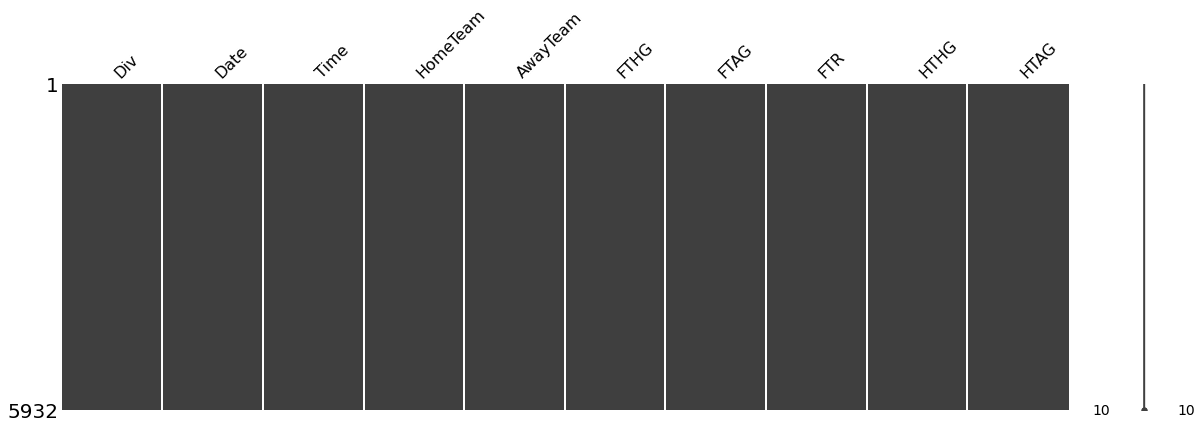

In [35]:
mno.matrix(df_2019_20.iloc[:,0:10], figsize = (20, 6))

In [36]:
import os
os.getcwd()

'C:\\Users\\ASUS\\Dissertation'

In [37]:
os.chdir("D:\DBS\DBS\Dissertation\Directory")

In [38]:
missing_cols3 = ["AC","AF",
"AHh",
"AS",
"AST",
"Avg<2.5",
"Avg>2.5",
"AvgA",
"AvgAHA",
"AvgAHH",
"AvgD",
"AvgH",
"B365<2.5",
"B365>2.5",
"B365A",
"B365AHA",
"B365AHH",
"B365CAHA",
"B365CAHH",
"B365D",
"B365H",
"BWA",
"BWCA",
"BWCD",
"BWCH",
"BWD",
"BWH",
"HC",
"HF",
"HS",
"HST",
"IWA",
"IWCA",
"IWCD",
"IWCH",
"IWD",
"IWH",
"Max<2.5",
"Max>2.5",
"MaxA",
"MaxAHA",
"MaxAHH",
"MaxD",
"MaxH",
"P<2.5",
"P>2.5",
"PAHA",
"PAHH",
"PC<2.5",
"PC>2.5",
"PCAHA",
"PCAHH",
"PSA",
"PSCA",
"PSCD",
"PSCH",
"PSD",
"PSH",
"VCA",
"VCCA",
"VCCD",
"VCCH",
"VCD",
"VCH",
"WHA",
"WHCA",
"WHCD",
"WHCH",
"WHD",
"WHH"
]

In [39]:
def random_imputation(df_2019_20, feature):

    number_missing = df_2019_20[feature].isnull().sum()
    observed_values = df_2019_20.loc[df_2019_20[feature].notnull(), feature]
    df_2019_20.loc[df_2019_20[feature].isnull(),feature] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df_2019_20

In [40]:
for feature in missing_cols3:
    #df_2019_20[feature + '_imp'] = df_2019_20[feature]
    df_2019_20 = random_imputation(df_2019_20, feature)

In [41]:
df_2019_20.shape

(5932, 107)

In [42]:
df_2019_20 = df_2019_20.drop(['Referee', 'Time'], axis = 1) 

In [43]:
df_2019_20.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.00000,5932.000000,5932.000000,5932.000000,...,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.00000,5932.000000
mean,1.488874,1.170263,0.654754,0.520398,12.848786,10.606709,4.66116,3.833614,12.813048,13.375084,...,1.970843,-0.287298,1.933136,1.932842,1.952738,1.952203,2.000088,2.001167,1.92223,1.922702
std,1.246831,1.114128,0.819067,0.731373,5.002568,4.506266,2.52784,2.251389,4.162353,4.253168,...,0.443987,0.690679,0.104666,0.102252,0.106360,0.104043,0.105689,0.107844,0.09830,0.096315
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,...,1.290000,-4.000000,1.550000,1.270000,1.610000,1.300000,1.680000,1.300000,1.61000,1.280000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,7.000000,3.00000,2.000000,10.000000,10.000000,...,1.690000,-0.500000,1.850000,1.850000,1.870000,1.870000,1.920000,1.920000,1.85000,1.840000
50%,1.000000,1.000000,0.000000,0.000000,12.000000,10.000000,4.00000,4.000000,13.000000,13.000000,...,1.880000,-0.250000,1.930000,1.930000,1.950000,1.950000,2.000000,2.000000,1.92000,1.920000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,13.000000,6.00000,5.000000,15.000000,16.000000,...,2.140000,0.000000,2.020000,2.020000,2.030000,2.030000,2.080000,2.080000,2.00000,2.000000
max,8.000000,9.000000,5.000000,5.000000,38.000000,33.000000,19.00000,22.000000,30.000000,36.000000,...,6.940000,3.250000,3.550000,2.370000,3.930000,2.450000,3.950000,2.700000,3.66000,2.360000


In [44]:
df_2019_20['Total_Goals'] = df_2019_20['FTAG'] + df_2019_20['FTHG']

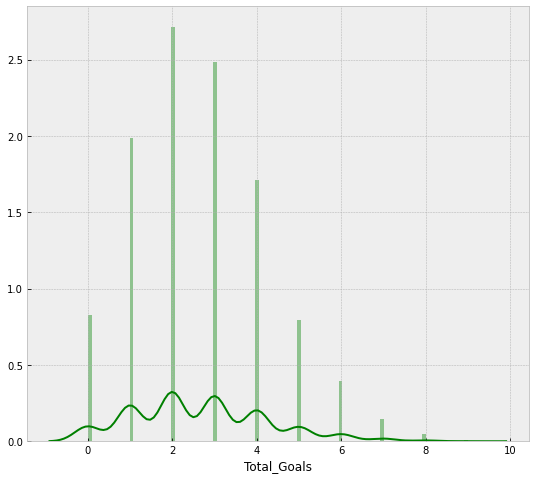

In [45]:
plt.figure(figsize=(9, 8))
sns.distplot(df_2019_20['Total_Goals'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [46]:
#total goals is normally distributed
#2 is the highest no of total goals 

In [47]:
df_2019_20['FTR'].value_counts()

H    2593
A    1739
D    1600
Name: FTR, dtype: int64

In [48]:
#the data is not balanced as the FTR data leans towards the Home wins

In [49]:
Full_time_res = pd.get_dummies(df_2019_20['FTR'])

In [50]:
Full_time_res.rename(columns={'H':'FTR_H','D':'FTR_D','A':'FTR_A'},inplace=True)

In [51]:
Full_time_res.head()

,FTR_A,FTR_D,FTR_H
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [52]:
half_time_res = pd.get_dummies(df_2019_20['HTR'])

In [53]:
half_time_res.rename(columns={'H':'HTR_H','D':'HTR_D','A':'HTR_A'},inplace=True)

In [54]:
#df_2019_20.drop({'FTR','HTR'},axis=1,inplace=True)

In [55]:
df_2019_20 = pd.concat([df_2019_20,Full_time_res,half_time_res],axis=1)

In [56]:
condition = [(df_2019_20['Total_Goals'] > 2.5),(df_2019_20['Total_Goals'] < 2.5)]
values = ['1','0']
df_2019_20['Above 2.5'] = np.select(condition,values)

In [58]:
#df_2019_20.to_excel("df_new.xlsx")

In [59]:
df_2019_20['Above 2.5'].value_counts()

1    2985
0    2947
Name: Above 2.5, dtype: int64

In [60]:
df_2019_20.shape

(5932, 113)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


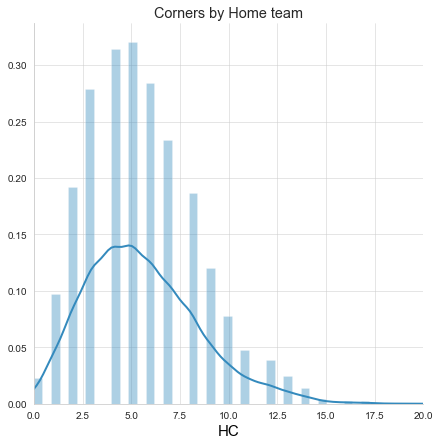

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


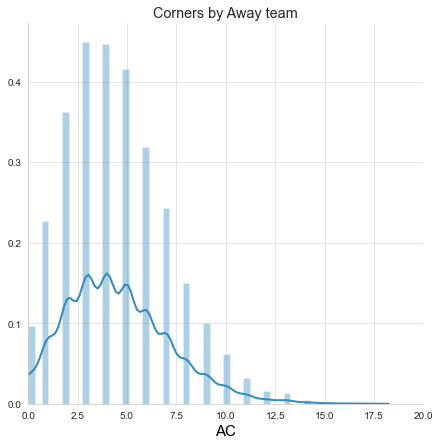

In [61]:
sns.set_style("whitegrid")
a=sns.FacetGrid(df_2019_20,size=6) \
   .map(sns.distplot,"HC") \
   .add_legend()
plt.xlim(0,20)
plt.xlabel("HC",size=15,color="Black")
plt.title("Corners by Home team")
plt.show()
sns.set_style("whitegrid")
sns.FacetGrid(df_2019_20,size=6,) \
   .map(sns.distplot,"AC") \
   .add_legend()
plt.xlabel("AC",size=15,color="Black")
plt.title("Corners by Away team")
plt.xlim(0,20)
plt.show()


In [62]:
#Home team corners = 5 is maximum and the next maximum are 4 and 6.
#Away team corners = 3 is maximum and the next maximum are 4 and 5.

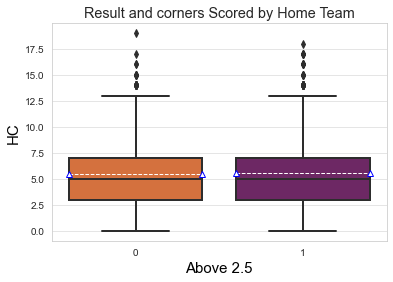

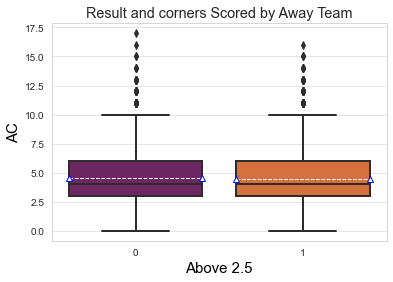

In [63]:
sns.boxplot(data=df_2019_20,x="Above 2.5",y="HC",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and corners Scored by Home Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("HC",size=15,color="Black")
plt.show()

sns.boxplot(data=df_2019_20,x="Above 2.5",y="AC",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and corners Scored by Away Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("AC",size=15,color="Black")
plt.show()


In [64]:
#with respect to goals scored above/below 2.5, average corners by home teams are higher than the away teams where
#average corners by home teams are around 5 in matches with total goals above and below 2.5

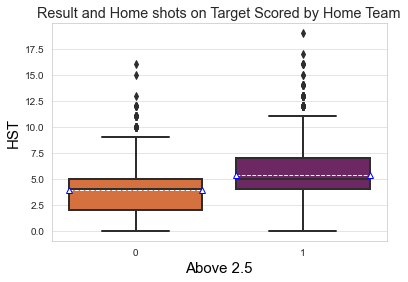

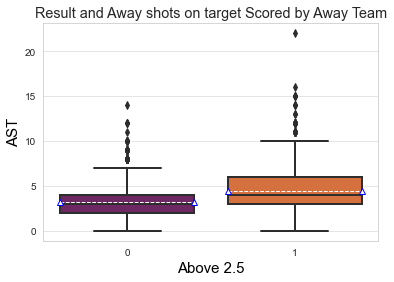

In [65]:
sns.boxplot(data=df_2019_20,x="Above 2.5",y="HST",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Home shots on Target Scored by Home Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("HST",size=15,color="Black")
plt.show()

sns.boxplot(data=df_2019_20,x="Above 2.5",y="AST",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Away shots on target Scored by Away Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("AST",size=15,color="Black")
plt.show()

In [66]:
#the average home shots on target is 5 when total goals are above 2.5 and 4 when goals are below 2.5
#the average away shots on target is 4 when total goals are above 2.5 and 3 when goals are below 2.5

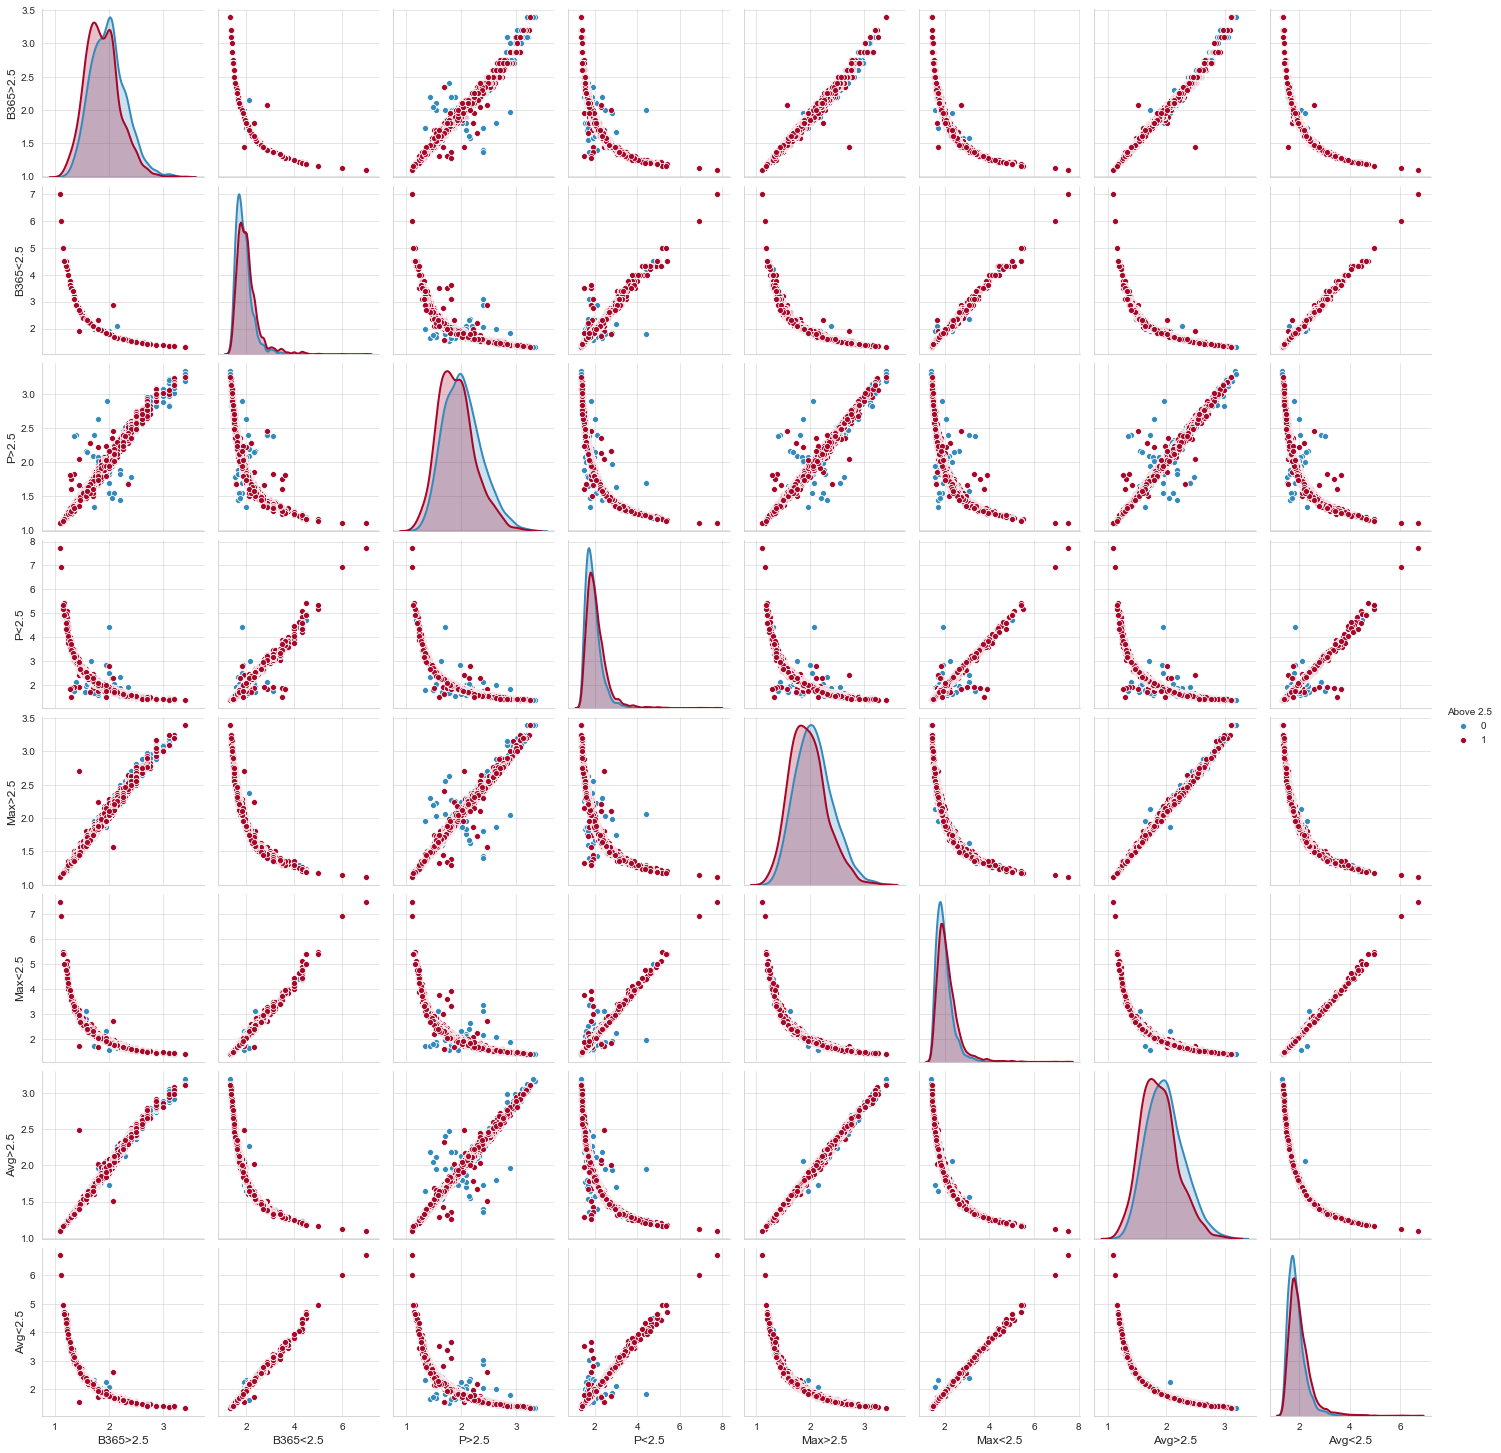

In [67]:
sns.pairplot(data=df_2019_20[['B365>2.5','B365<2.5','P>2.5','P<2.5','Max>2.5','Max<2.5','Avg>2.5','Avg<2.5','Above 2.5']],
            hue='Above 2.5')

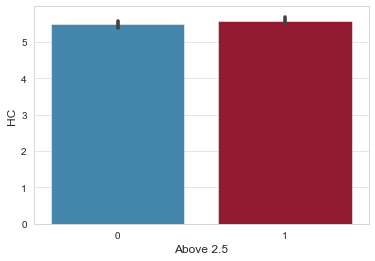

In [68]:
sns.barplot(x='Above 2.5', y='HC', data=df_2019_20)
#sns.barplot(y='Above 2.5', x='HC', data=df_2019_20) 

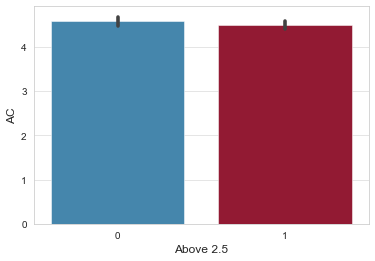

In [69]:
sns.barplot(x='Above 2.5', y='AC', data=df_2019_20)

In [70]:
df_teams_above2_5 = df_2019_20.groupby(['Above 2.5','HomeTeam']).size()

In [71]:
df_teams_above2_5.to_excel("df_teams_above2_5.xlsx")

In [72]:
#df_sort.to_excel("df_after_sort.xlsx")

In [73]:
df_2019_20['Date'] = pd.to_datetime(df_2019_20['Date'], dayfirst = True)

In [74]:
df_2019_20.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgCAHA,Country,Total_Goals,FTR_A,FTR_D,FTR_H,HTR_A,HTR_D,HTR_H,Above 2.5
0,E1,2019-08-02,Luton,Middlesbrough,3,3,D,2,2,D,...,1.93,England,6,0,1,0,0,1,0,1
1,E1,2019-08-03,Barnsley,Fulham,1,0,H,1,0,H,...,1.84,England,1,0,0,1,0,0,1,0
2,E1,2019-08-03,Blackburn,Charlton,1,2,A,0,1,A,...,1.98,England,3,1,0,0,1,0,0,1
3,E1,2019-08-03,Brentford,Birmingham,0,1,A,0,1,A,...,1.90,England,1,1,0,0,1,0,0,0
4,E1,2019-08-03,Millwall,Preston,1,0,H,1,0,H,...,1.80,England,1,0,0,1,0,0,1,0


In [75]:
df_2019_20_new = df_2019_20

In [76]:
#df_2019_20_new.to_excel("df_after_datetime.xlsx")

In [77]:
df_sort = df_2019_20_new.groupby('HomeTeam').apply(lambda x: x.sort_values('Date'))

In [78]:
#df_sort.reset_index(level=0, drop=True,inplace=True)

In [79]:
df_sort.reset_index(inplace = True, drop = True)

In [80]:
#df_sort.head(20)

In [81]:
df_sort['HC_Avg_1']=df_sort.groupby('HomeTeam',sort=True).rolling(window=5).HC.mean().reset_index(drop='HomeTeam')
df_sort['HS_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).HS.mean().reset_index(drop='HomeTeam')
#df_sort['AS_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).AS.mean().reset_index(drop='HomeTeam')
df_sort['HST_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).HST.mean().reset_index(drop='HomeTeam')
#df_sort['AST_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).AST.mean().reset_index(drop='HomeTeam')
#df_sort['AC_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).AC.mean().reset_index(drop='HomeTeam')
df_sort['HF_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).HF.mean().reset_index(drop='HomeTeam')
#df_sort['AF_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).AF.mean().reset_index(drop='HomeTeam')
df_sort['HY_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).HY.mean().reset_index(drop='HomeTeam')
#df_sort['AY_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).AY.mean().reset_index(drop='HomeTeam')
df_sort['HR_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).HR.mean().reset_index(drop='HomeTeam')
#df_sort['AR_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).AR.mean().reset_index(drop='HomeTeam')

In [82]:
missing_cols3 = ["HC_Avg_1","HS_Avg_1","HST_Avg_1","HF_Avg_1","HY_Avg_1","HR_Avg_1"]

In [83]:
def random_imputation(df_sort, feature):

    number_missing = df_sort[feature].isnull().sum()
    observed_values = df_sort.loc[df_sort[feature].notnull(), feature]
    df_sort.loc[df_sort[feature].isnull(),feature] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df_sort


In [84]:
for feature in missing_cols3:
    #df_2019_20[feature + '_imp'] = df_2019_20[feature]
    df_sort = random_imputation(df_sort, feature)

In [85]:
df_sort.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HTR_A,HTR_D,HTR_H,Above 2.5,HC_Avg_1,HS_Avg_1,HST_Avg_1,HF_Avg_1,HY_Avg_1,HR_Avg_1
0,G1,2019-08-25,AEK,Xanthi,1,2,A,0,0,D,...,0,1,0,1,5.6,13.2,10.0,15.6,1.0,0.0
1,G1,2019-09-15,AEK,Lamia,2,0,H,2,0,H,...,0,0,1,0,7.8,14.0,4.8,14.8,1.0,0.0
2,G1,2019-09-29,AEK,PAOK,2,2,D,0,1,A,...,1,0,0,1,4.0,14.4,3.6,10.6,1.8,0.2
3,G1,2019-10-20,AEK,Volos NFC,3,2,H,1,1,D,...,0,1,0,1,5.0,14.4,5.8,12.8,2.0,0.0
4,G1,2019-11-03,AEK,Atromitos,3,2,H,0,1,A,...,1,0,0,1,6.6,12.4,6.0,13.8,2.2,0.2
5,G1,2019-11-24,AEK,Aris,1,1,D,0,0,D,...,0,1,0,0,7.2,13.0,6.6,13.6,2.2,0.0
6,G1,2019-12-07,AEK,Panionios,5,0,H,2,0,H,...,0,0,1,1,7.2,12.6,6.0,14.2,2.0,0.0
7,G1,2019-12-18,AEK,Asteras Tripolis,2,1,H,1,0,H,...,0,0,1,1,7.6,12.2,6.2,16.0,2.0,0.0
8,G1,2020-01-05,AEK,Panetolikos,3,1,H,1,1,D,...,0,1,0,1,7.2,12.6,6.6,18.2,2.4,0.0
9,G1,2020-01-19,AEK,Larisa,3,0,H,1,0,H,...,0,0,1,1,8.0,11.4,5.8,20.0,2.4,0.0


In [86]:
df_sort = df_sort.groupby('AwayTeam').apply(lambda x: x.sort_values('Date'))

In [87]:
#df_sort.reset_index(level=0, drop=True,inplace=True)
df_sort.reset_index(inplace = True, drop = True)

In [88]:
#df_sort['HC_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).HC.mean().reset_index(drop='AwayTeam')
#df_sort['HS_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).HS.mean().reset_index(drop='AwayTeam')
df_sort['AS_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).AS.mean().reset_index(drop='AwayTeam')
#df_sort['HST_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).HST.mean().reset_index(drop='AwayTeam')
df_sort['AST_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).AST.mean().reset_index(drop='AwayTeam')
df_sort['AC_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).AC.mean().reset_index(drop='AwayTeam')
#df_sort['HF_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).HF.mean().reset_index(drop='AwayTeam')
df_sort['AF_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).AF.mean().reset_index(drop='AwayTeam')
#df_sort['HY_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).HY.mean().reset_index(drop='AwayTeam')
df_sort['AY_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).AY.mean().reset_index(drop='AwayTeam')
#df_sort['HR_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).HR.mean().reset_index(drop='AwayTeam')
df_sort['AR_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).AR.mean().reset_index(drop='AwayTeam')

In [89]:
missing_cols4 = ["AS_Avg_2","AST_Avg_2","AC_Avg_2","AF_Avg_2",
                 "AY_Avg_2","AR_Avg_2"]

In [90]:
def random_imputation(df_sort, feature):

    number_missing = df_sort[feature].isnull().sum()
    observed_values = df_sort.loc[df_sort[feature].notnull(), feature]
    df_sort.loc[df_sort[feature].isnull(),feature] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df_sort

In [91]:
for feature in missing_cols4:
    #df_2019_20[feature + '_imp'] = df_2019_20[feature]
    df_sort = random_imputation(df_sort, feature)

In [92]:
df_new = df_sort.drop(['HC', 'HS','AS','HST','AST','AC','HF','AF','HY','AY','HR','AR'], axis = 1) 

In [93]:
df_new.shape

(5932, 113)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


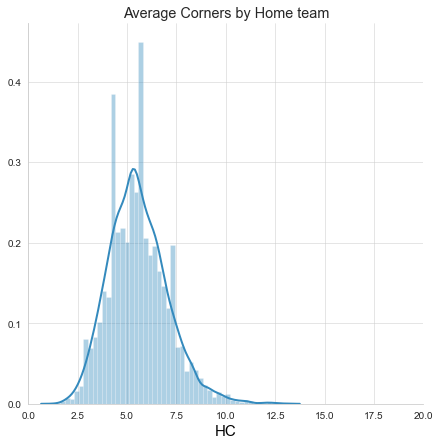

In [94]:
sns.set_style("whitegrid")
a=sns.FacetGrid(df_new,size=6) \
   .map(sns.distplot,"HC_Avg_1") \
   .add_legend()
plt.xlim(0,20)
plt.xlabel("HC",size=15,color="Black")
plt.title("Average Corners by Home team")
plt.show()
sns.set_style("whitegrid")


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


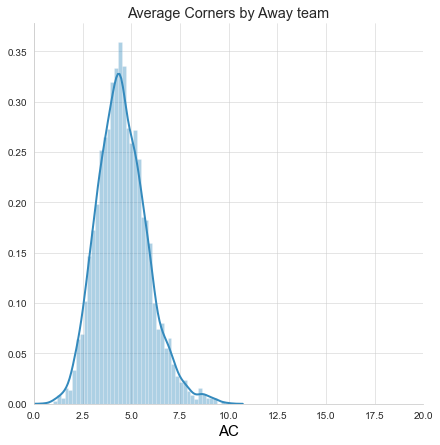

In [95]:
sns.set_style("whitegrid")
sns.FacetGrid(df_new,size=6,) \
   .map(sns.distplot,"AC_Avg_2") \
   .add_legend()
plt.xlabel("AC",size=15,color="Black")
plt.title("Average Corners by Away team")
plt.xlim(0,20)
plt.show()


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


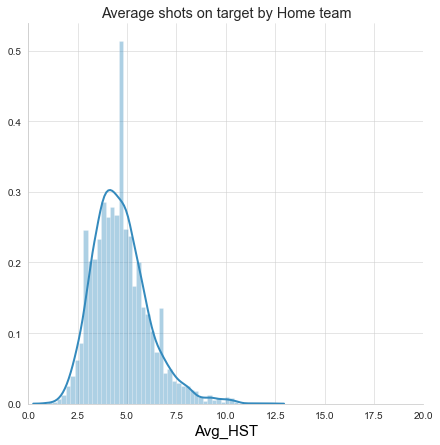

In [96]:
sns.set_style("whitegrid")
a=sns.FacetGrid(df_new,size=6) \
   .map(sns.distplot,"HST_Avg_1") \
   .add_legend()
plt.xlim(0,20)
plt.xlabel("Avg_HST",size=15,color="Black")
plt.title("Average shots on target by Home team")
plt.show()

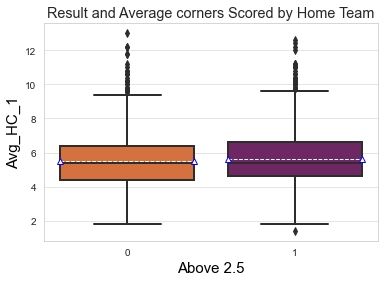

In [97]:
sns.boxplot(data=df_new,x="Above 2.5",y="HC_Avg_1",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Average corners Scored by Home Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg_HC_1",size=15,color="Black")
plt.show()

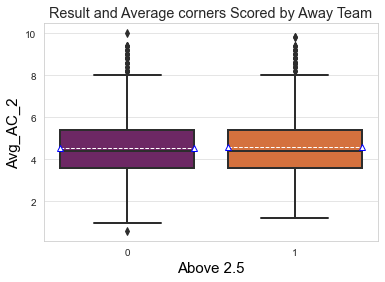

In [98]:
sns.boxplot(data=df_new,x="Above 2.5",y="AC_Avg_2",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Average corners Scored by Away Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg_AC_2",size=15,color="Black")
plt.show()


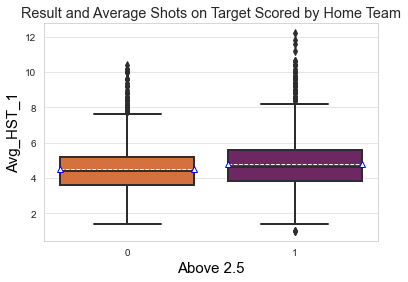

In [99]:
sns.boxplot(data=df_new,x="Above 2.5",y="HST_Avg_1",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Average Shots on Target Scored by Home Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg_HST_1",size=15,color="Black")
plt.show()

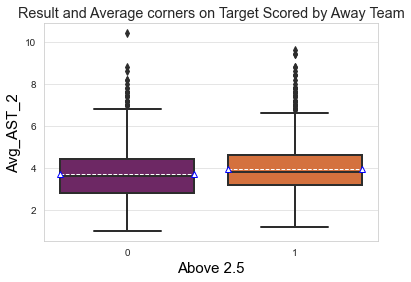

In [100]:
sns.boxplot(data=df_new,x="Above 2.5",y="AST_Avg_2",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Average corners on Target Scored by Away Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg_AST_2",size=15,color="Black")
plt.show()


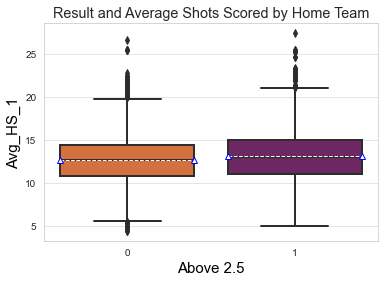

In [101]:
sns.boxplot(data=df_new,x="Above 2.5",y="HS_Avg_1",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Average Shots Scored by Home Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg_HS_1",size=15,color="Black")
plt.show()

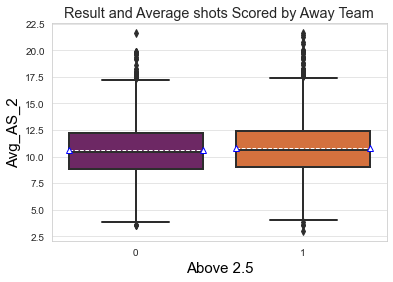

In [102]:
sns.boxplot(data=df_new,x="Above 2.5",y="AS_Avg_2",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Average shots Scored by Away Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg_AS_2",size=15,color="Black")
plt.show()

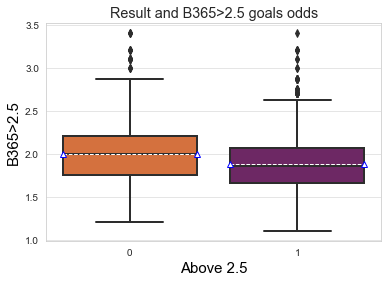

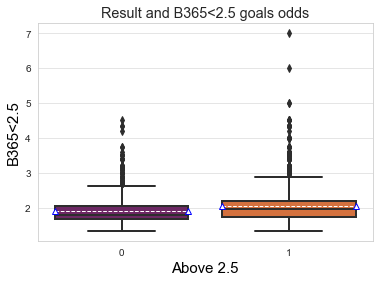

In [103]:
sns.boxplot(data=df_new,x="Above 2.5",y="B365>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and B365>2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("B365>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="B365<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and B365<2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("B365<2.5",size=15,color="Black")
plt.show()

In [104]:
#Incidentally, average B365 odds for goals greater than 2.5 is higher when total goals are less than 2.5.
# Average B365 odds for goals lesser than 2.5 is higher when total goals are above 2.5.

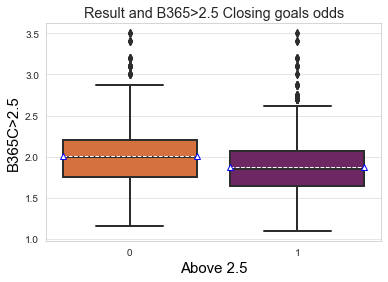

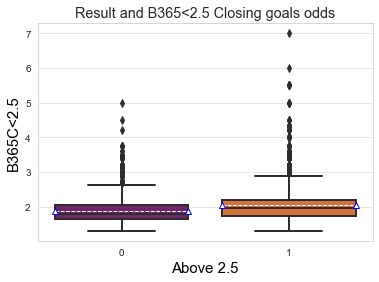

In [105]:
sns.boxplot(data=df_new,x="Above 2.5",y="B365C>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and B365>2.5 Closing goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("B365C>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="B365C<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and B365<2.5 Closing goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("B365C<2.5",size=15,color="Black")
plt.show()

In [106]:
#Bet 365 closing odds for goals above/under 2.5 shows trends similar to normal Bet 365 odds.

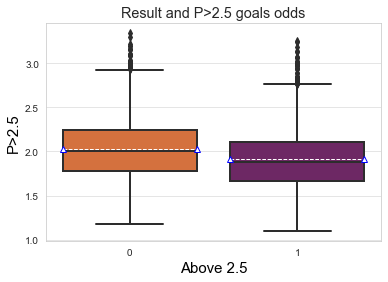

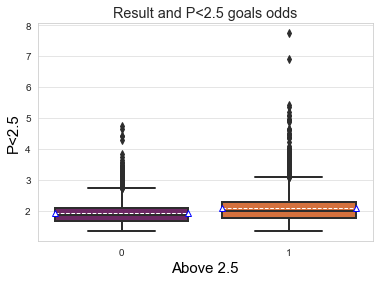

In [107]:
sns.boxplot(data=df_new,x="Above 2.5",y="P>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and P>2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("P>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="P<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and P<2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("P<2.5",size=15,color="Black")
plt.show()

In [108]:
#Pinnacle also shows similar pattern like B365

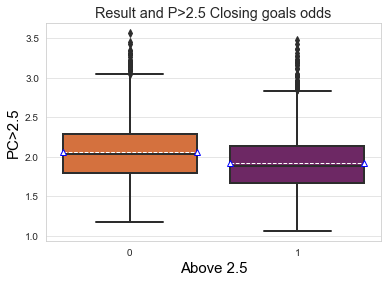

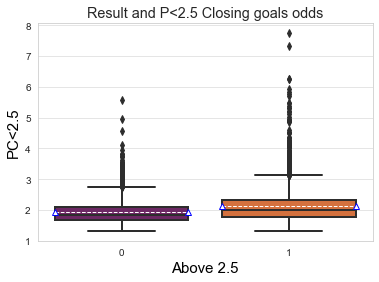

In [109]:
sns.boxplot(data=df_new,x="Above 2.5",y="PC>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and P>2.5 Closing goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("PC>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="PC<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and P<2.5 Closing goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("PC<2.5",size=15,color="Black")
plt.show()

In [110]:
#Bet 365 closing odds for goals above/under 2.5 shows trends similar to normal Bet 365 odds.

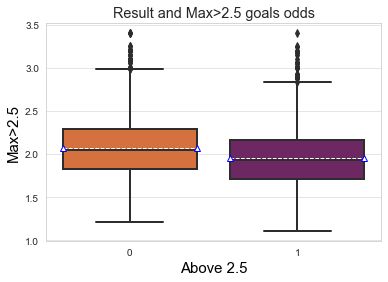

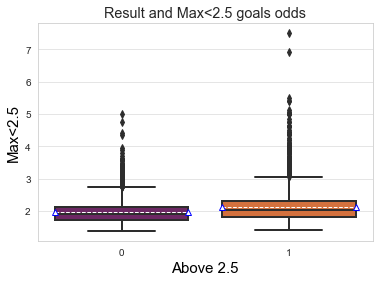

In [111]:
sns.boxplot(data=df_new,x="Above 2.5",y="Max>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Max>2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Max>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Max<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Max<2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Max<2.5",size=15,color="Black")
plt.show()

In [112]:
#Maximum odds for goals greater than 2.5 also shows similar pattern like B365

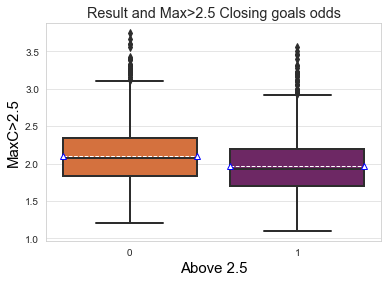

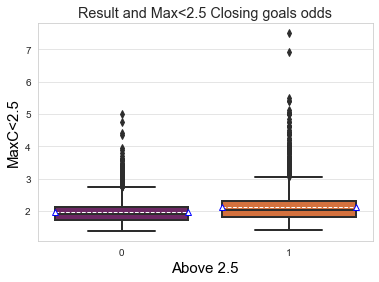

In [113]:
sns.boxplot(data=df_new,x="Above 2.5",y="MaxC>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Max>2.5 Closing goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("MaxC>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Max<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Max<2.5 Closing goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("MaxC<2.5",size=15,color="Black")
plt.show()

In [114]:
#The closing odds of Maximum odds above/under 2.5 goals shows similar trends to normal odds 
#It can be assumed that the closing and normal odds are correlated.

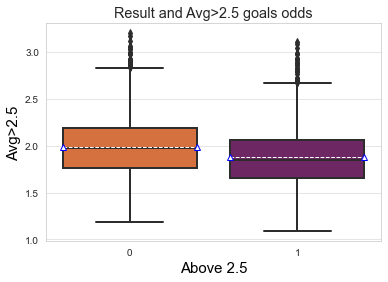

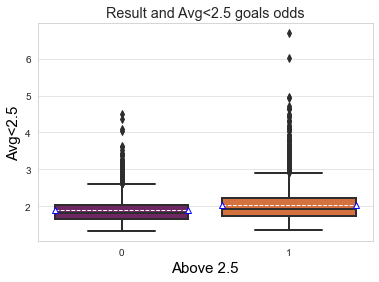

In [115]:
sns.boxplot(data=df_new,x="Above 2.5",y="Avg>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Avg>2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Avg<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Avg<2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg<2.5",size=15,color="Black")
plt.show()

In [116]:
#Average odds for goals greater than 2.5 also shows similar pattern like B365

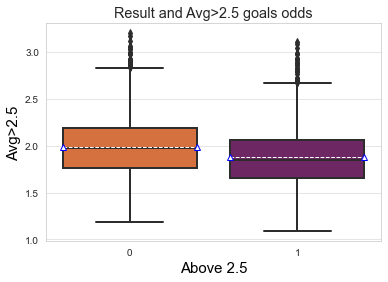

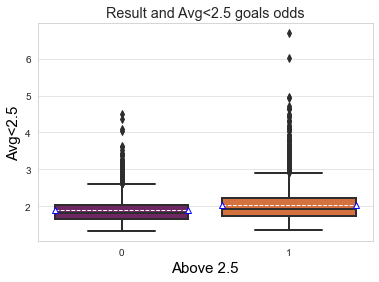

In [117]:
sns.boxplot(data=df_new,x="Above 2.5",y="Avg>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Avg>2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Avg<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Avg<2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg<2.5",size=15,color="Black")
plt.show()

In [118]:
#second half goals

df_new['SH_AG'] = df_new['FTAG'] - df_new['HTAG']
df_new['SH_HG'] = df_new['FTHG'] - df_new['HTHG']

In [119]:
df_new.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HY_Avg_1,HR_Avg_1,AS_Avg_2,AST_Avg_2,AC_Avg_2,AF_Avg_2,AY_Avg_2,AR_Avg_2,SH_AG,SH_HG
0,G1,2019-09-01,Asteras Tripolis,AEK,2,3,A,1,1,D,...,1.2,0.0,11.2,4.2,3.8,11.8,3.0,0.0,2,1
1,G1,2019-09-21,Panetolikos,AEK,0,1,A,0,0,D,...,2.6,0.0,8.8,3.2,4.0,11.8,1.8,0.2,1,0
2,G1,2019-10-05,Larisa,AEK,0,0,D,0,0,D,...,2.2,0.0,9.0,2.4,4.4,14.2,2.4,0.0,0,0
3,G1,2019-10-27,Olympiakos,AEK,2,0,H,1,0,H,...,1.2,0.0,14.0,2.8,4.0,10.2,1.6,0.2,0,1
4,G1,2019-11-10,Panathinaikos,AEK,3,2,H,0,2,A,...,3.6,0.2,10.6,4.6,4.4,19.8,2.8,0.0,0,3


In [120]:
df_new['SH_AG'] = abs(df_new['SH_AG'])
df_new['SH_HG'] = abs(df_new['SH_HG'])

In [121]:
#df_new.to_excel("df_new.xlsx")

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


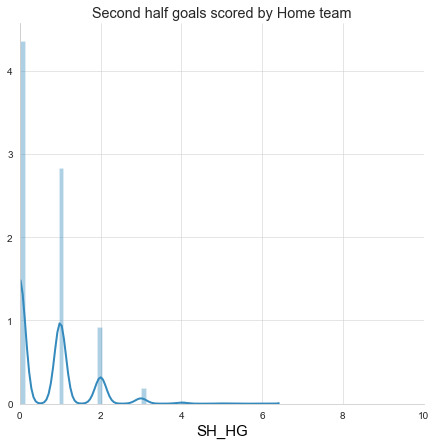

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


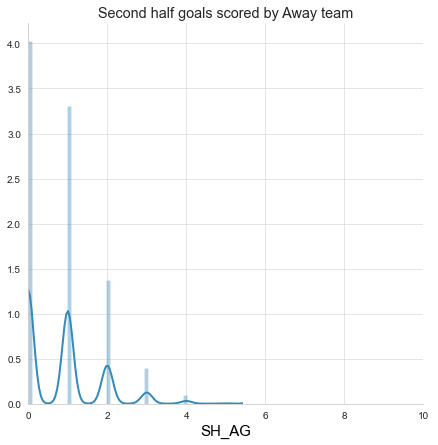

In [122]:
sns.set_style("whitegrid")
a=sns.FacetGrid(df_new,size=6) \
   .map(sns.distplot,"SH_AG") \
   .add_legend()
plt.xlim(0,10)
plt.xlabel("SH_HG",size=15,color="Black")
plt.title("Second half goals scored by Home team")
plt.show()
sns.set_style("whitegrid")
sns.FacetGrid(df_new,size=6,) \
   .map(sns.distplot,"SH_HG") \
   .add_legend()
plt.xlabel("SH_AG",size=15,color="Black")
plt.title("Second half goals scored by Away team")
plt.xlim(0,10)
plt.show()

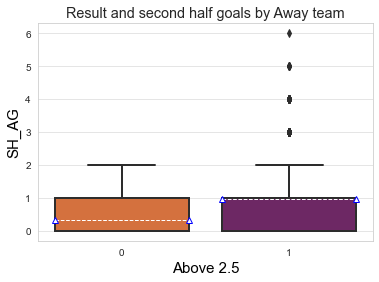

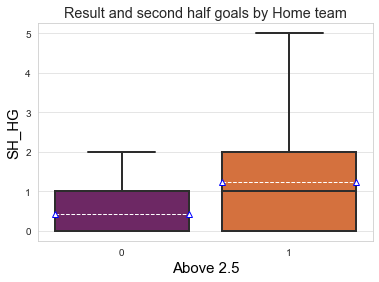

In [123]:
sns.boxplot(data=df_new,x="Above 2.5",y="SH_AG",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and second half goals by Away team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("SH_AG",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="SH_HG",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and second half goals by Home team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("SH_HG",size=15,color="Black")
plt.show()

In [124]:
#df_new.to_excel("df_new.xlsx")

In [125]:
df_new['Multip_B365_B365C'] = df_new['B365>2.5'] * df_new['B365C>2.5']
df_new['Multip2_B365_B365C'] = df_new['B365<2.5'] * df_new['B365C<2.5']

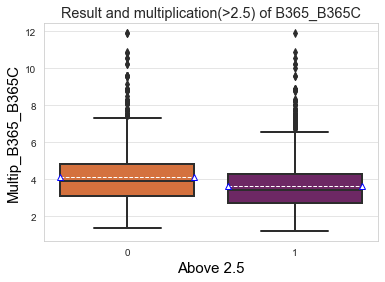

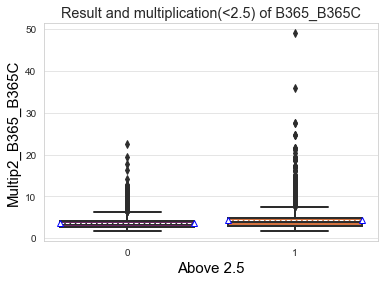

In [126]:
sns.boxplot(data=df_new,x="Above 2.5",y="Multip_B365_B365C",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and multiplication(>2.5) of B365_B365C")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Multip_B365_B365C",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Multip2_B365_B365C",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and multiplication(<2.5) of B365_B365C")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Multip2_B365_B365C",size=15,color="Black")
plt.show()

In [127]:
df_new['Diff_B365_B365C'] = df_new['B365>2.5'] - df_new['B365C>2.5']
df_new['Diff2_B365_B365C'] = df_new['B365<2.5'] - df_new['B365C<2.5']

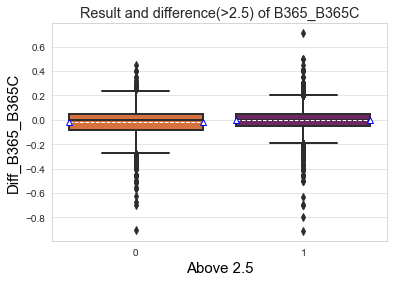

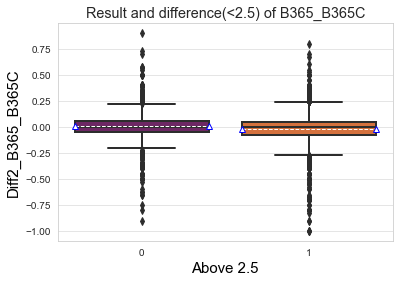

In [128]:
sns.boxplot(data=df_new,x="Above 2.5",y="Diff_B365_B365C",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and difference(>2.5) of B365_B365C")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Diff_B365_B365C",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Diff2_B365_B365C",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and difference(<2.5) of B365_B365C")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Diff2_B365_B365C",size=15,color="Black")
plt.show()

In [129]:
df_new['Diff_P_PC'] = df_new['P>2.5'] - df_new['PC>2.5']
df_new['Diff2_P_PC'] = df_new['P<2.5'] - df_new['PC<2.5']

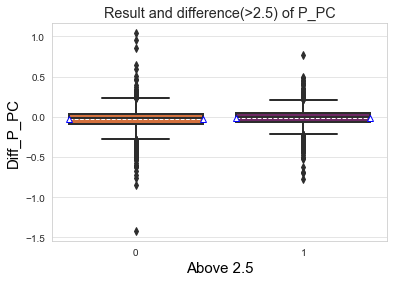

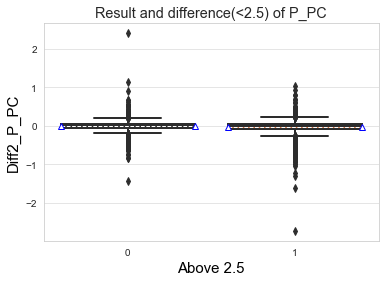

In [130]:
sns.boxplot(data=df_new,x="Above 2.5",y="Diff_P_PC",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and difference(>2.5) of P_PC")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Diff_P_PC",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Diff2_P_PC",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and difference(<2.5) of P_PC")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Diff2_P_PC",size=15,color="Black")
plt.show()

In [131]:
df_new['Diff_Max_MaxC'] = df_new['Max>2.5'] - df_new['MaxC>2.5']
df_new['Diff2_Max_MaxC'] = df_new['Max<2.5'] - df_new['MaxC<2.5']

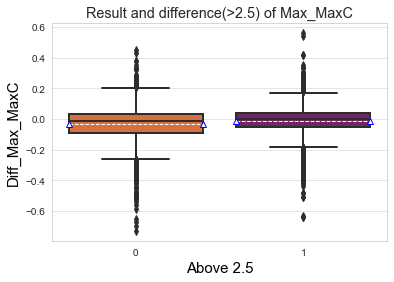

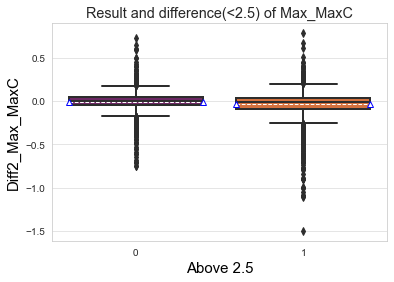

In [132]:
sns.boxplot(data=df_new,x="Above 2.5",y="Diff_Max_MaxC",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and difference(>2.5) of Max_MaxC")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Diff_Max_MaxC",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Diff2_Max_MaxC",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and difference(<2.5) of Max_MaxC")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Diff2_Max_MaxC",size=15,color="Black")
plt.show()

In [133]:
df_new['Multip_Max_MaxC'] = df_new['Max>2.5'] * df_new['MaxC>2.5']
df_new['Multip2_Max_MaxC'] = df_new['Max<2.5'] * df_new['MaxC<2.5']

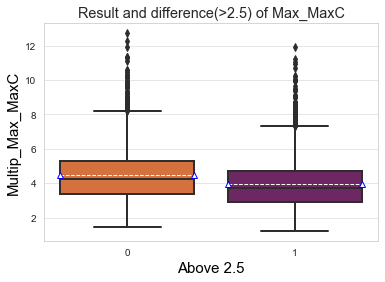

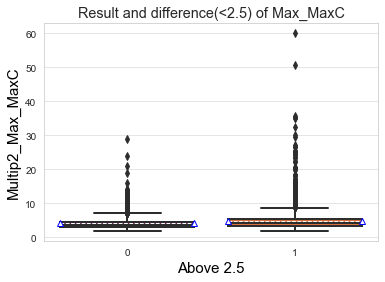

In [134]:
sns.boxplot(data=df_new,x="Above 2.5",y="Multip_Max_MaxC",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and difference(>2.5) of Max_MaxC")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Multip_Max_MaxC",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Multip2_Max_MaxC",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and difference(<2.5) of Max_MaxC")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Multip2_Max_MaxC",size=15,color="Black")
plt.show()

In [135]:
df_new['Multip_Avg_AvgC'] = df_new['Avg>2.5'] * df_new['AvgC>2.5']
df_new['Multip2_Avg_AvgC'] = df_new['Avg<2.5'] * df_new['AvgC<2.5']

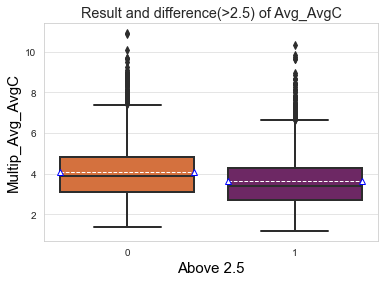

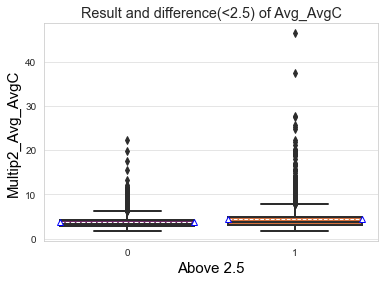

In [136]:
sns.boxplot(data=df_new,x="Above 2.5",y="Multip_Avg_AvgC",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and difference(>2.5) of Avg_AvgC")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Multip_Avg_AvgC",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Multip2_Avg_AvgC",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and difference(<2.5) of Avg_AvgC")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Multip2_Avg_AvgC",size=15,color="Black")
plt.show()

In [137]:
df_new['Diff_Avg_AvgC'] = df_new['Avg>2.5'] - df_new['AvgC>2.5']
df_new['Diff2_Avg_AvgC'] = df_new['Avg<2.5'] - df_new['AvgC<2.5']

In [138]:
df_new['Multip_B365H_VCH'] = df_new['B365H'] * df_new['VCH']
df_new['Multip_B365A_VCA'] = df_new['B365A'] * df_new['VCA']

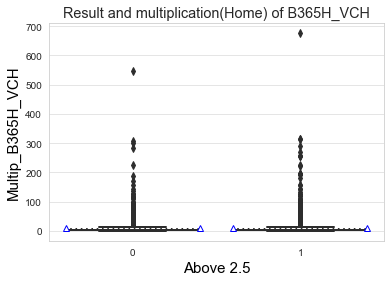

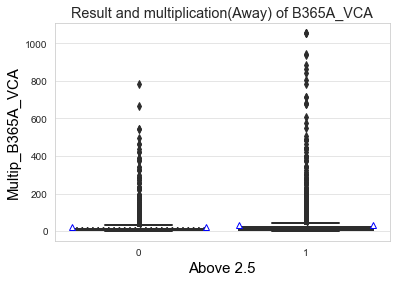

In [139]:
sns.boxplot(data=df_new,x="Above 2.5",y="Multip_B365H_VCH",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and multiplication(Home) of B365H_VCH")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Multip_B365H_VCH",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Multip_B365A_VCA",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and multiplication(Away) of B365A_VCA")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Multip_B365A_VCA",size=15,color="Black")
plt.show()

In [140]:
df_new['Diff_B365H_VCH'] = df_new['B365H'] - df_new['VCH']
df_new['Diff_B365A_VCA'] = df_new['B365A'] - df_new['VCA']

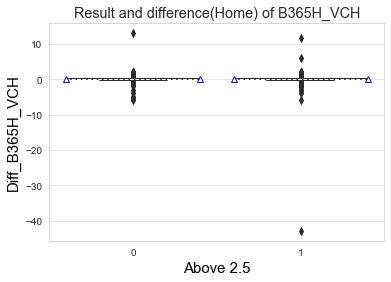

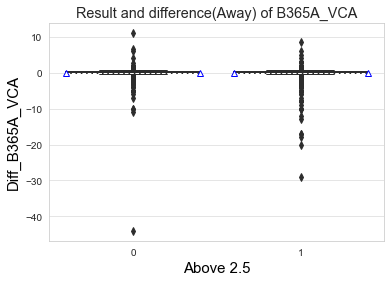

In [141]:
sns.boxplot(data=df_new,x="Above 2.5",y="Diff_B365H_VCH",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and difference(Home) of B365H_VCH")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Diff_B365H_VCH",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Diff_B365A_VCA",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and difference(Away) of B365A_VCA")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Diff_B365A_VCA",size=15,color="Black")
plt.show()

In [142]:
#Both the differences and multiplication of B365 and VC betting odds do not yield any useful information for Target.

In [143]:
df_new['Div_B365H_VCH'] = df_new['B365H'] / df_new['VCH']
df_new['Div_B365A_VCA'] = df_new['B365A'] / df_new['VCA']

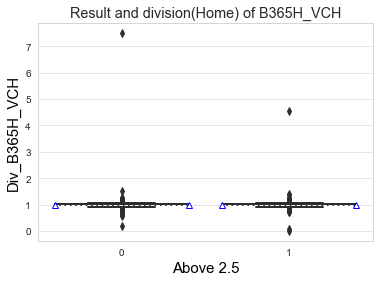

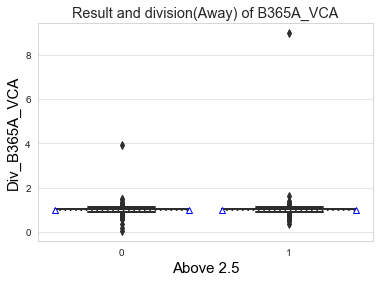

In [144]:
sns.boxplot(data=df_new,x="Above 2.5",y="Div_B365H_VCH",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and division(Home) of B365H_VCH")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Div_B365H_VCH",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Div_B365A_VCA",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and division(Away) of B365A_VCA")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Div_B365A_VCA",size=15,color="Black")
plt.show()

In [145]:
df_new['Multip_B365H_BWH'] = df_new['B365H'] * df_new['BWH']
df_new['Multip_B365A_BWA'] = df_new['B365A'] * df_new['BWA']

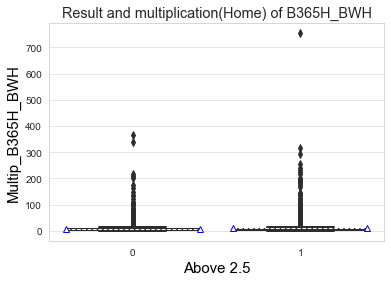

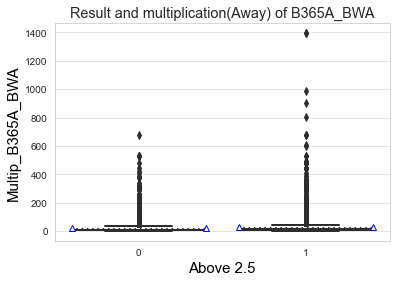

In [146]:
sns.boxplot(data=df_new,x="Above 2.5",y="Multip_B365H_BWH",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and multiplication(Home) of B365H_BWH")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Multip_B365H_BWH",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Multip_B365A_BWA",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and multiplication(Away) of B365A_BWA")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Multip_B365A_BWA",size=15,color="Black")
plt.show()

In [147]:
df_new['Multip_B365H_B365>2.5'] = df_new['B365H'] * df_new['B365>2.5']
df_new['Multip_B365H_B365<2.5'] = df_new['B365H'] * df_new['B365<2.5']

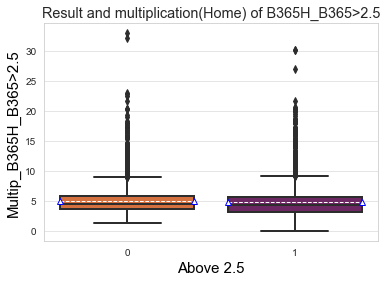

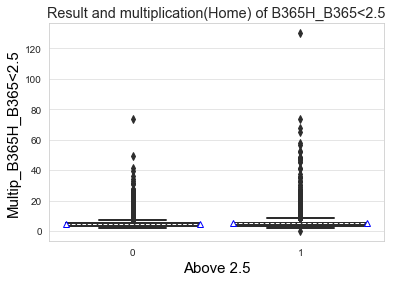

In [148]:
sns.boxplot(data=df_new,x="Above 2.5",y="Multip_B365H_B365>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and multiplication(Home) of B365H_B365>2.5")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Multip_B365H_B365>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Multip_B365H_B365<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and multiplication(Home) of B365H_B365<2.5")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Multip_B365H_B365<2.5",size=15,color="Black")
plt.show()

In [149]:
cols = df_new.select_dtypes(exclude=['int']).columns

df_new[cols] = df_new[cols].apply(pd.to_numeric, errors='coerce')

In [150]:
df_new.drop(['HomeTeam','AwayTeam','FTR','HTR','Country','Div'], axis = 1,inplace=True) 

In [151]:
df_corr = df_new.corr(method='pearson')

In [152]:
#df_corr.to_excel('df_Corr.xlsx')

In [153]:
#determine index for continuous variables
#df_index = df_new.dtypes[df_new.dtypes!='object'].index

#calculate skew and sort
#df_skew = df_new[df_index].skew().sort_values(ascending=False)
#skew = pd.DataFrame({'Skew':df_skew})

In [154]:
#skew.to_excel('df_skew.xlsx')

In [155]:
df_new['Diff_BWD_BWCD'] = df_new['BWD'] - df_new['BWCD']
df_new['Diff_IWD_IWCD'] = df_new['IWD'] - df_new['IWCD']
df_new['Multip_IWD_IWCD'] = df_new['IWD'] * df_new['IWCD']
df_new['Multip_PSD_PSCD'] = df_new['PSD'] * df_new['PSCD']
df_new['Diff_PSD_PSCD'] = df_new['PSCD'] -  df_new['PSD'] 
df_new['Diff_WHD_WHCD'] = df_new['WHCD'] -  df_new['WHD']
df_new['Diff_MaxD_MaxCD'] = df_new['MaxCD'] -  df_new['MaxD']


In [156]:
df_new['Diff_PSH_PSCH'] = df_new['PSH'] -  df_new['PSCH']
df_new['Diff_PSA_PSCA'] = df_new['PSA'] -  df_new['PSCA']
df_new['Diff_BWH_BWCH'] = df_new['BWH'] -  df_new['BWCH']
df_new['Diff_PCAHA_PAHA'] = df_new['PCAHA'] -  df_new['PAHA']
df_new['Diff_AvgH_AvgCH'] = df_new['AvgH'] -  df_new['AvgCH']
df_new['Diff_IWH_IWCH'] = df_new['IWH'] - df_new['IWCH']
df_new['Diff_AvgAHA_AvgCAHA'] = df_new['AvgAHA'] -  df_new['AvgCAHA']
df_new['Diff_B365D_B365CD'] = df_new['B365D'] -  df_new['B365CD']
df_new['Diff_MaxH_MaxCH'] = df_new['MaxCH'] -  df_new['MaxH']
df_new['Diff_AvgAHH_AvgCAHH'] = df_new['AvgAHH'] -  df_new['AvgCAHH']
df_new['Diff_B365CAHA_B365AHA'] = df_new['B365CAHA'] -  df_new['B365AHA']
df_new['Diff_AvgD_AvgCD'] = df_new['AvgD'] -  df_new['AvgCD']
df_new['Diff_B365CA_B365A'] = df_new['B365CA'] -  df_new['B365A']
df_new['Diff_PCAHH_PAHH'] = df_new['PCAHH'] -  df_new['PAHH']
df_new['Diff_AvgA_AvgCA'] = df_new['AvgA'] -  df_new['AvgCA']
df_new['Diff_AHCh_AHh'] = df_new['AHCh'] -  df_new['AHh']
df_new['Diff_Max_MaxC'] = df_new['MaxC>2.5'] -  df_new['Max>2.5']
df_new['Diff2_Max_MaxC'] = df_new['MaxC<2.5'] -  df_new['Max<2.5']
df_new['Diff_VCD_VCCD'] = df_new['VCD'] -  df_new['VCCD']
df_new['Diff_WHA_WHCA'] = df_new['WHCA'] -  df_new['WHA']
df_new['Diff_WHH_WHCH'] = df_new['WHCH'] -  df_new['WHH']
df_new['Diff_MaxAHA_MaxCAHA'] = df_new['MaxAHA'] -  df_new['MaxCAHA']
df_new['Diff_VCA_VCCA'] = df_new['VCA'] -  df_new['VCCA']
df_new['Diff_VCH_VCCH'] = df_new['VCH'] -  df_new['VCCH']
df_new['Diff_IWA_IWCA'] = df_new['IWA'] - df_new['IWCA']
df_new['Diff_BWA_BWCA'] = df_new['BWA'] -  df_new['BWCA']
df_new['Diff_B365CH_B365H'] = df_new['B365CH'] -  df_new['B365H']
df_new['Diff_MaxAHH_MaxCAHH'] = df_new['MaxAHH'] -  df_new['MaxCAHH']
df_new['Diff_MaxA_MaxCA'] = df_new['MaxCA'] -  df_new['MaxA']



In [157]:
#df_new.drop(['Diff_IWD_IWCD'], axis = 1,inplace=True) 

In [158]:
#import scipy.stats as stats

#calculate point-biserial correlation
#stats.pointbiserialr(df_new['Multip_MaxD_MaxCD'], df_new['Above 2.5'])

In [159]:
correlated_features = set()
correlation_matrix = df_new.corr()

In [160]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [161]:
correlated_features2 = pd.DataFrame(correlated_features)

In [162]:
correlated_features2.shape

(98, 1)

In [163]:
df_new.shape
#df_new.to_excel('df_new.xlsx')

(5932, 167)

In [164]:
#correlated_features2.to_excel('correlated_features.xlsx')

In [165]:
#to be eliminated features
#B365D, BWD, B365<2.5, Avg<2.5, P<2.5, Max<2.5, IWD, PSD, WHD, VCD, AvgD, MaxD, 

In [166]:
df_new.drop(labels=correlated_features, axis=1, inplace=True)

In [167]:
#df_new.to_excel('df_new.xlsx')

FileCreateError: [Errno 13] Permission denied: 'df_new.xlsx'

In [168]:
x = df_new.drop(['Above 2.5'], axis=1)
y = df_new['Above 2.5']

In [169]:
df_new.dtypes

Date                   int64
FTHG                   int64
FTAG                   int64
HTHG                   int64
HTAG                   int64
                      ...   
Diff_VCA_VCCA        float64
Diff_IWA_IWCA        float64
Diff_BWA_BWCA        float64
Diff_B365CH_B365H    float64
Diff_MaxA_MaxCA      float64
Length: 69, dtype: object

In [170]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split( 
        x, y, test_size = 0.25, random_state = 2) 

In [171]:
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain)  
xtest = sc_x.transform(xtest) 
  
print (xtrain[0:10, :]) 

[[ 1.19572429e+00 -1.19271891e+00  7.33671204e-01 -7.96130246e-01
   6.46050928e-01  4.02128262e-01 -3.50525778e-01 -6.33662648e-01
   1.82878896e-01 -3.70369645e-01  8.03792819e-01 -5.70572610e-01
   5.16000903e-01 -7.87880453e-01 -4.02455417e-01  1.54628784e+00
  -6.16064026e-01 -8.68526073e-01  1.72610184e+00 -8.41739476e-01
  -7.08179872e-01 -3.91119504e-01  3.71736292e-01 -8.92350248e-01
   2.48872285e-01 -9.98238481e-02  7.58189686e-01 -2.80685416e-02
  -8.74530261e-01  1.26604855e+00  4.07420305e-01 -5.10754529e-01
   5.14402515e-01  4.22692499e-01 -9.09823144e-01  1.12751566e-01
   5.75411915e-02 -7.06800819e-01  5.61156405e-01 -2.13686858e-01
  -5.45383485e-01  2.30965842e-01  1.81678381e-02  2.25597572e-01
  -2.79989288e-01  8.24255388e-02 -3.19743499e-02 -2.85772823e-01
  -7.07454374e-01 -5.26656457e-01  9.91658927e-02 -9.32259549e-03
   5.46804684e-02  1.90856108e-01  1.06407037e-01  1.79478952e-01
   1.07460199e-01 -4.05770249e-02  2.13719439e-02 -3.76676184e-02
   4.37788

In [172]:
#df_new.to_excel('df_new.xlsx')

In [173]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 2) 
classifier.fit(xtrain, ytrain) 

LogisticRegression(random_state=2)

In [174]:
y_pred = classifier.predict(xtest) 

In [175]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(ytest, y_pred) 
  
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[732   0]
 [  0 751]]


In [176]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 

Accuracy :  1.0


In [177]:
#print ("logistic auc: ", sklearn.metrics.roc_auc_score(ytesy,ypred))

In [195]:
df_new.drop(['FTR_A','FTR_H','FTR_D','HTR_A','HTR_D','HTR_H'], axis = 1,inplace=True) 

In [179]:
#df_new.columns

In [196]:
df_new.drop(['FTAG','FTHG','HTHG','HTAG'], axis = 1,inplace=True) 
x.shape

(5932, 68)

In [182]:
df_corr2 = df_new.corr(method='pearson')
#df_corr2.to_excel('df_Corr2.xlsx')

In [194]:
df_new.drop(['Total_Goals'], axis = 1,inplace=True)

KeyError: "['Total_Goals'] not found in axis"

In [188]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [197]:
cv = KFold(n_splits=10)            # Desired number of Cross Validation folds
accuracies = list()
max_attributes = len(list(df_new))
depth_range = range(1, max_attributes + 1)

# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth = depth)
    # print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(df_new):
        f_train = df_new.loc[train_fold] # Extract train data with cv indices
        f_valid = df_new.loc[valid_fold] # Extract valid data with cv indices

        model = tree_model.fit(X = f_train.drop(['Above 2.5'], axis=1), 
                               y = f_train["Above 2.5"]) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid.drop(['Above 2.5'], axis=1), 
                                y = f_valid["Above 2.5"])# We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    # print("Accuracy per fold: ", fold_accuracy, "\n")
    # print("Average accuracy: ", avg)

In [198]:
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
#print(df.to_string(index=False))
df.sort_values('Average Accuracy',ascending=False)

,Max Depth,Average Accuracy
3,4,0.787429
4,5,0.782371
5,6,0.776133
6,7,0.774953
7,8,0.764667
8,9,0.760789
9,10,0.752190
1,2,0.745958
2,3,0.745958
10,11,0.744943


In [191]:
#max_depth = 4 yields the highest accuracy which is 0.787429. 

In [199]:
# Create Decision Tree with max_depth = 4
decision_tree = tree.DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(xtrain, ytrain)

# Predicting results for test dataset
y_pred = decision_tree.predict(xtest)
submission = pd.DataFrame({
        "Original": ytest,
        "Predicted values": y_pred
    })
submission.to_csv('submission.csv', index=False)

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = True,
                              feature_names = None,
                              class_names = ['0', '1'],                            
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])


# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
font = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', 26)
draw.text((10, 0), # Drawing offset (position)
          '"Title <= 1.5" corresponds to "Mr." title', # Text to draw
          (0,0,255), # RGB desired color
          font=font) # ImageFont object with desired font
img.save('sample-out.png')
PImage("sample-out.png")


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
dtree = classifier.fit(xtrain, ytrain)

In [ ]:
y_pred = classifier.predict(xtest)

In [193]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

[[732   0]
 [  0 751]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       732
           1       1.00      1.00      1.00       751

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483



In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtree, filled=True)

In [ ]:
export_graphviz(dtree, out_file='tree.dot')

In [ ]:
print(tree.export_text(classifier))

In [ ]:
df_new.feature_names

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(xtrain,ytrain)

In [ ]:
y_pred = classifier.predict(xtest)

In [ ]:
cm = confusion_matrix(ytest,y_pred)
accuracy = float(cm.diagonal().sum())/len(ytest)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)